# DSLabs functions

In [14]:
%run "scripts/dslabs_functions.py"


# Data functions

In [1]:
%run "scripts/data_functions.py"


data_functions loaded


# Load

In [2]:
import pandas as pd
import numpy as np


filepath=r'data/df_merch_0_2024_agg_time_mv_input.csv'


file_tag = "Google Merch Store 2024-2025"


# test_data=True
test_data=False


data=pd.read_csv(filepath, decimal=".",  index_col='Date', parse_dates=True,  infer_datetime_format=True)

 
target='Sessions'
series: Series = data[target]

test_split_threshold = 0.90

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 427 entries, 2024-01-04 to 2025-03-05
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sessions                         427 non-null    int64  
 1   Seven-day active users           427 non-null    int64  
 2   28-day active users              427 non-null    int64  
 3   Events per session               427 non-null    float64
 4   Average purchase revenue         427 non-null    float64
 5   Purchase revenue                 427 non-null    float64
 6   Average session duration         427 non-null    float64
 7   ARPU                             427 non-null    float64
 8   ARPPU                            427 non-null    float64
 9   Views per user                   427 non-null    float64
 10  Promotion clicks                 427 non-null    float64
 11  Sessions Mobile                  427 non-null    int64  
 12  Sev

# Scale 0 - no scaling

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


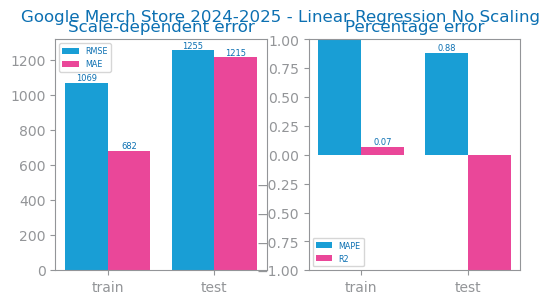

In [3]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression
from numpy import arange


data_0 = data.copy()

# Split the data into train and test sets
train_0, test_0 = series_train_test_split(data_0, trn_pct=test_split_threshold)


# Ensure no data leakage
assert not set(train_0.index).intersection(set(test_0.index)), "Data leakage detected: Train and test sets overlap."


# Prepare the training and testing data from dataframes with features and target
# trnX_0 = train_0.drop(columns=[target])
# trnY_0 = train_0[target]
# tstX_0 = test_0.drop(columns=[target])
# tstY_0 = test_0[target]


# Prepare the training and testing data using the time index as the feature
trnX_0 = arange(len(train_0)).reshape(-1, 1)
trnY_0 = train_0[target].to_numpy()
tstX_0 = arange(len(train_0), len(data_0)).reshape(-1, 1)
tstY_0 = test_0[target].to_numpy()



# Fit the linear regression model
model_0 = LinearRegression()
model_0.fit(trnX_0, trnY_0)

# Predict the training and testing data
prd_trn_0 = Series(model_0.predict(trnX_0), index=train_0.index)
prd_tst_0 = Series(model_0.predict(tstX_0), index=test_0.index)

# Plot the forecasting evaluation
plot_forecasting_eval(train_0[target], test_0[target], prd_trn_0, prd_tst_0, title=f"{file_tag} - Linear Regression No Scaling")
savefig(f"images/{file_tag}_linear_regression_eval_no_scale.png")

## no scaling plot

<Axes: xlabel='Date', ylabel='Sessions'>

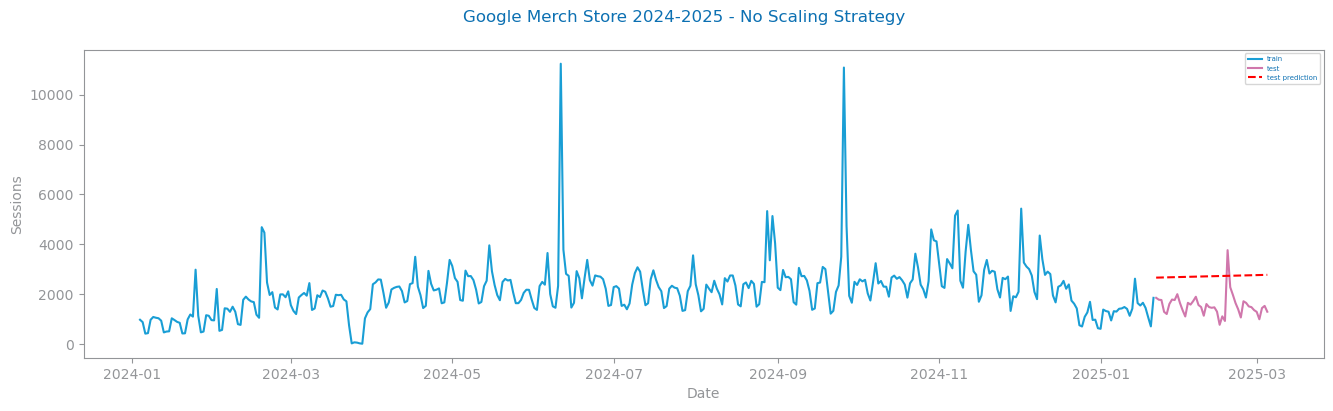

In [4]:
plot_forecasting_series(
    train_0[target],
    test_0[target],
    prd_tst_0,
    title=f"{file_tag} - No Scaling Strategy",
    xlabel='Date',
    ylabel=target,
)

# Scale 1 - Standard Scaler

## Scale 1 strategy Application

In [5]:

def apply_strategy_1(df):

    df_copy=df.copy()
    
    df_zscore=apply_standard_scaler(df_copy,target)

    return df_zscore


data_1=apply_strategy_1(data)

series_1: Series = data_1[target]

data_1



,Seven-day active users,28-day active users,Events per session,Average purchase revenue,Purchase revenue,Average session duration,ARPU,ARPPU,Views per user,Promotion clicks,...,Sessions referral,season,commercial_season,week_of_month,day_of_week_nr,is_weekend,is_holiday,is_major_event_day,is_commercial_event_day,Sessions
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-04,-2.697404,-3.064131,1.571703,-0.342166,-0.279732,1.529411,0.906177,-0.384752,1.584796,-0.945008,...,-0.432707,-0.423466,0.323359,-1.704564,0.0,-0.632456,-0.170046,-0.138178,-0.068599,982
2024-01-05,-2.517432,-3.010950,1.610270,0.806316,0.151394,2.126569,2.912732,0.674347,1.936745,-0.945008,...,-0.451646,-0.423466,0.323359,-1.704564,0.5,-0.632456,-0.170046,-0.138178,-0.068599,887
2024-01-06,-2.430615,-2.985296,0.629416,-0.898693,-0.811699,0.709071,-0.586024,-0.942848,0.833252,-0.945008,...,-0.599367,-0.423466,-0.395778,-1.704564,1.0,1.581139,-0.170046,-0.138178,-0.068599,426
2024-01-07,-2.338838,-2.958176,1.543969,-1.159933,-0.784798,0.334117,-0.396205,-1.346217,1.131190,-0.945008,...,-0.580429,-0.423466,-0.395778,-0.939213,1.5,1.581139,-0.170046,-0.138178,-0.068599,446
2024-01-08,-2.154732,-2.903774,0.869172,-0.904827,-0.637538,1.433019,-0.420419,-0.878149,1.316628,-0.945008,...,-0.409980,-0.423466,-0.395778,-0.939213,-1.5,-0.632456,-0.170046,-0.138178,-0.068599,981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-01,-0.856895,-0.697224,-0.653082,-0.755633,-0.742968,-1.900808,-1.065282,-0.813840,-1.188015,-0.513552,...,-0.474372,0.528218,-0.395778,-1.704564,1.0,1.581139,-0.170046,-0.138178,-0.068599,1298
2025-03-02,-0.871778,-0.704554,0.166045,-1.024740,-0.646855,-0.069996,-0.571362,-0.926868,-0.206964,-0.442950,...,-0.500886,0.528218,-0.395778,-0.939213,1.5,1.581139,-0.170046,-0.138178,-0.068599,1002
2025-03-03,-0.939578,-0.725402,1.208169,-0.069760,-0.238787,1.078468,0.323505,-0.127914,1.385714,0.133631,...,0.063487,0.528218,-0.395778,-0.939213,-1.5,-0.632456,-0.170046,-0.138178,-0.068599,1451


## Scale 1 evaluate

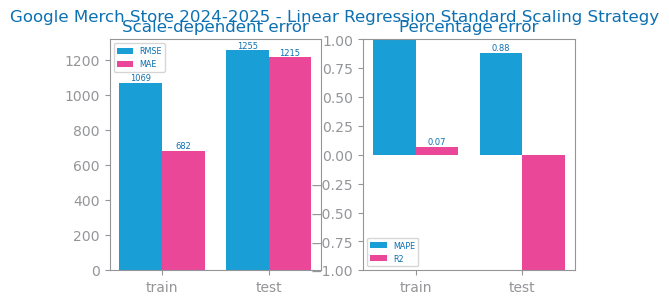

In [6]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression
from numpy import arange


# Split the data into train and test sets
train_1, test_1 = series_train_test_split(data_1, trn_pct=test_split_threshold)

# Ensure no data leakage
assert not set(train_1.index).intersection(set(test_1.index)), "Data leakage detected: Train and test sets overlap."



# Prepare the training and testing data from dataframes with features and target
# trnX_1 = train_1.drop(columns=[target])
# trnY_1 = train_1[target]
# tstX_1 = test_1.drop(columns=[target])
# tstY_1 = test_1[target]


# Prepare the training and testing data using the time index as the feature
trnX_1 = arange(len(train_1)).reshape(-1, 1)
trnY_1 = train_1[target].to_numpy()
tstX_1 = arange(len(train_1), len(data_1)).reshape(-1, 1)
tstY_1 = test_1[target].to_numpy()


# Fit the linear regression model
model_1 = LinearRegression()
model_1.fit(trnX_1, trnY_1)

# Predict the training and testing data
prd_trn_1 = Series(model_1.predict(trnX_1), index=train_1.index)
prd_tst_1 = Series(model_1.predict(tstX_1), index=test_1.index)

# Plot the forecasting evaluation
plot_forecasting_eval(train_1[target], test_1[target], prd_trn_1, prd_tst_1, title=f"{file_tag} - Linear Regression Standard Scaling Strategy")
savefig(f"images/{file_tag}_linear_regression_eval_no_scale.png")

## Scale 1 Plot

<Axes: xlabel='Date', ylabel='Sessions'>

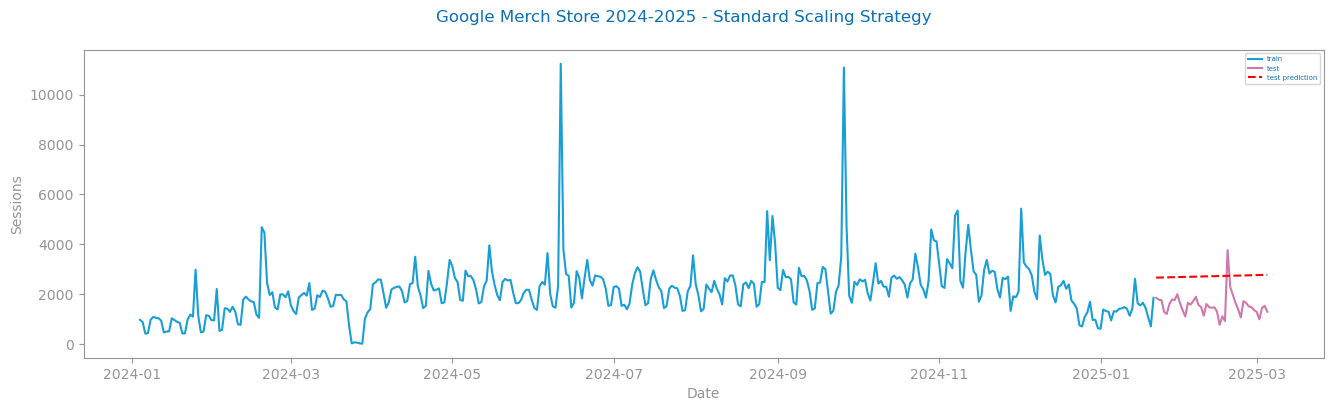

In [7]:
plot_forecasting_series(
    train_1[target],
    test_1[target],
    prd_tst_1,
    title=f"{file_tag} - Standard Scaling Strategy",
    xlabel='Date',
    ylabel=target,
)

# Scale 2 - MinMax Scaler


## Scale 2 strategy aplication

In [8]:
from pandas import DataFrame, Series
from sklearn.preprocessing import MinMaxScaler



def apply_strategy_2(df):

    df_copy=df.copy()
    
    # this script is available in data_functions originally from DSLabs site in Scaling chapter
    df_copy=apply_min_max_scaler(df,target)

    return df_copy

data_2=apply_strategy_2(data)

series_2: Series = data_2[target]

## Scale 2 evaluate

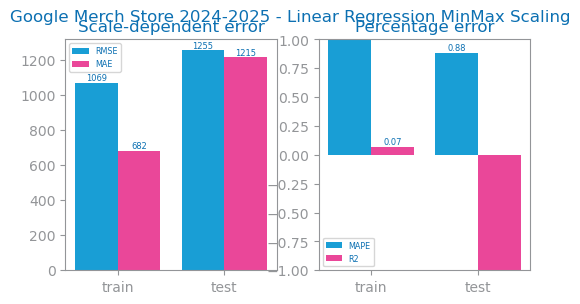

In [9]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression


# Split the data into train and test sets
train_2, test_2 = series_train_test_split(data_1, trn_pct=test_split_threshold)


# Ensure no data leakage
assert not set(train_1.index).intersection(set(test_1.index)), "Data leakage detected: Train and test sets overlap."


# Prepare the training and testing data from dataframes with features and target
# trnX_2 = train_2.drop(columns=[target])
# trnY_2 = train_2[target]
# tstX_2 = test_2.drop(columns=[target])
# tstY_2 = test_2[target]


# Prepare the training and testing data using the time index as the feature
trnX_2 = arange(len(train_2)).reshape(-1, 1)
trnY_2 = train_2[target].to_numpy()
tstX_2 = arange(len(train_2), len(data_2)).reshape(-1, 1)
tstY_2 = test_2[target].to_numpy()

# Fit the linear regression model
model_2 = LinearRegression()
model_2.fit(trnX_2, trnY_2)

# Predict the training and testing data
prd_trn_2 = Series(model_2.predict(trnX_2), index=train_2.index)
prd_tst_2 = Series(model_2.predict(tstX_2), index=test_2.index)

# Plot the forecasting evaluation
plot_forecasting_eval(train_2[target], test_2[target], prd_trn_2, prd_tst_2, title=f"{file_tag} - Linear Regression MinMax Scaling")
savefig(f"images/{file_tag}_linear_regression_eval_no_scale.png")

## Scale 2 Plot Forecast

<Axes: xlabel='Date', ylabel='Sessions'>

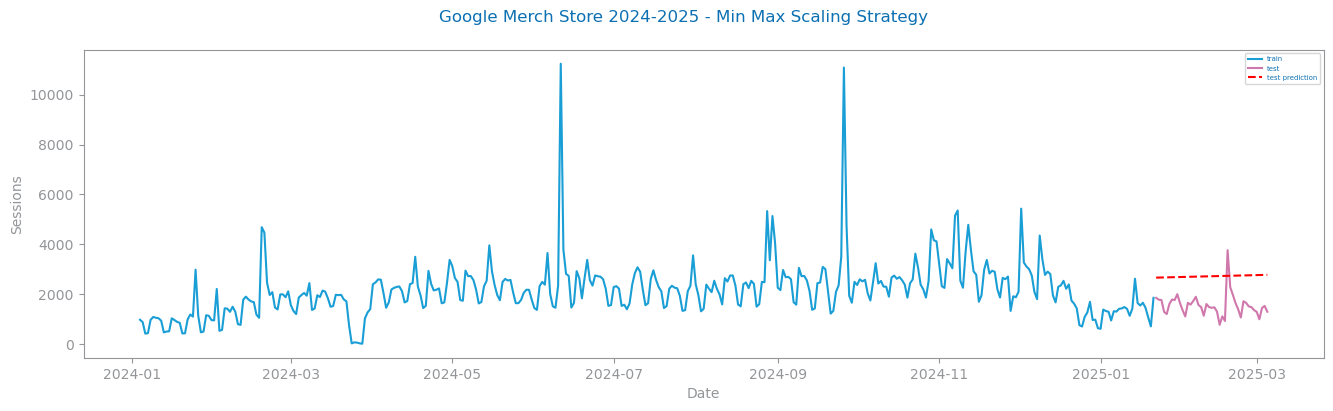

In [10]:
plot_forecasting_series(
    train_2[target],
    test_2[target],
    prd_tst_2,
    title=f"{file_tag} - Min Max Scaling Strategy",
    xlabel='Date',
    ylabel=target,
)

# scaling plot

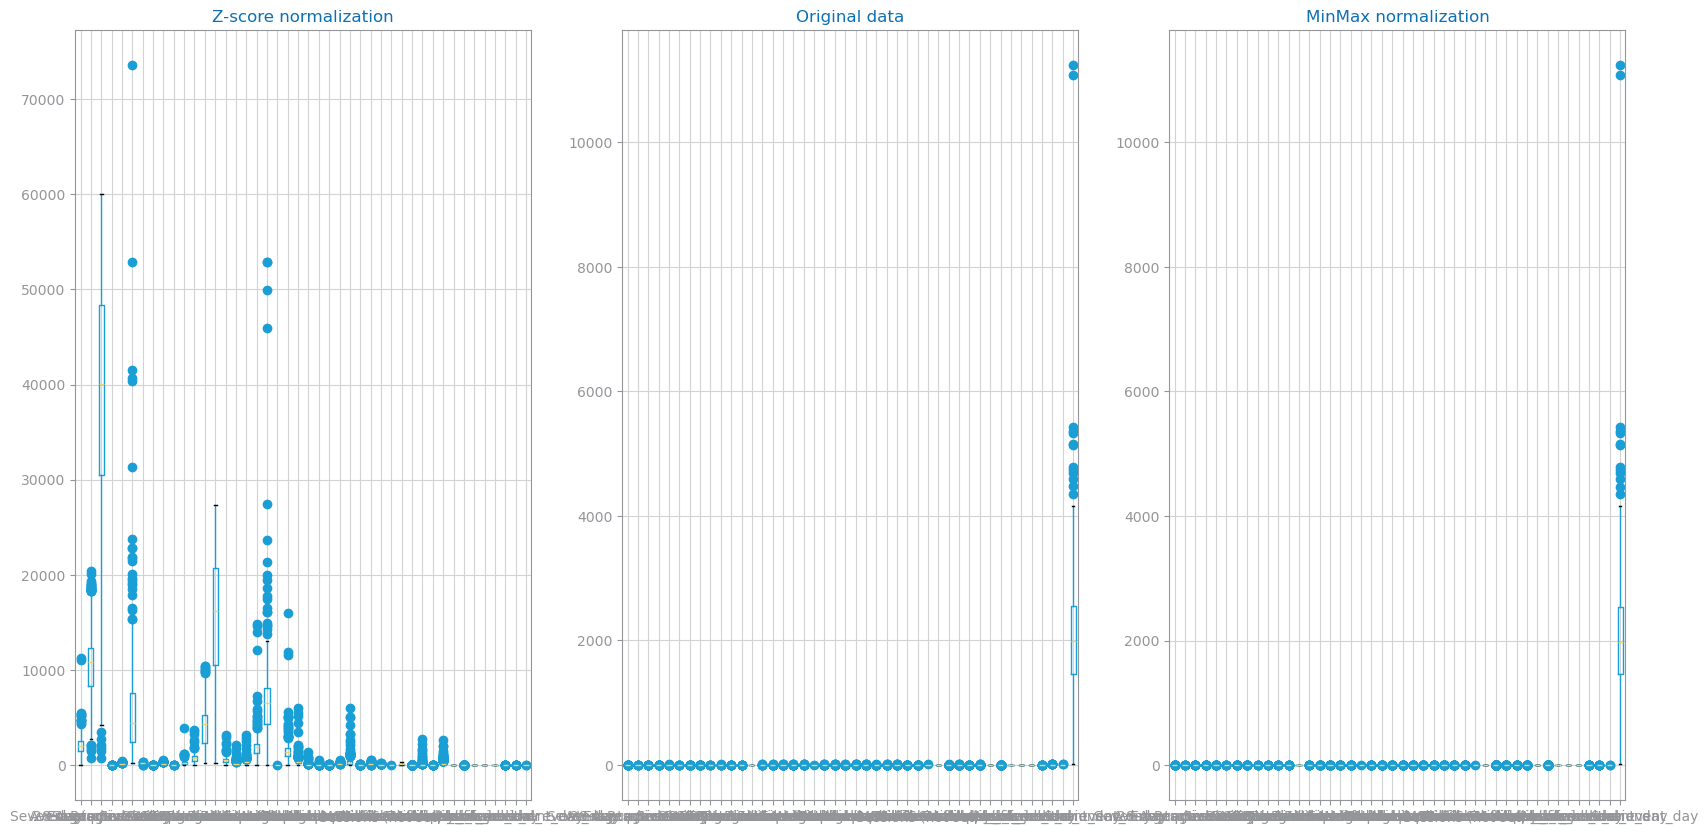

In [11]:

from matplotlib.pyplot import subplots, show

fig, axs = subplots(1, 3, figsize=(20, 10), squeeze=False)
axs[0, 1].set_title("Original data")
data.boxplot(ax=axs[0, 0])

axs[0, 0].set_title("Z-score normalization")
data_1.boxplot(ax=axs[0, 1])

axs[0, 2].set_title("MinMax normalization")
data_2.boxplot(ax=axs[0, 2])

savefig(f"images/{file_tag}_scaling_plots_evaluation.png")

show()

# Approach uplift comparison

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-10  # Small constant to avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Calculate performance metrics for each model
metrics = {
    "Model": ["No Scaling", "Standard Scaling", "MinMax Scaling"],
    "MAE": [
        mean_absolute_error(test_0[target], prd_tst_0),
        mean_absolute_error(test_1[target], prd_tst_1),
        mean_absolute_error(test_2[target], prd_tst_2)
    ],
    "MSE": [
        mean_squared_error(test_0[target], prd_tst_0),
        mean_squared_error(test_1[target], prd_tst_1),
        mean_squared_error(test_2[target], prd_tst_2)
    ],
    "RMSE": [
        mean_squared_error(test_0[target], prd_tst_0, squared=False),
        mean_squared_error(test_1[target], prd_tst_1, squared=False),
        mean_squared_error(test_2[target], prd_tst_2, squared=False)
    ],
    "R²": [
        r2_score(test_0[target], prd_tst_0),
        r2_score(test_1[target], prd_tst_1),
        r2_score(test_2[target], prd_tst_2)
    ],
    "MAPE": [
        mean_absolute_percentage_error(test_0[target], prd_tst_0),
        mean_absolute_percentage_error(test_1[target], prd_tst_1),
        mean_absolute_percentage_error(test_2[target], prd_tst_2)
    ]
}

# Create a DataFrame to display the metrics
performance_df = pd.DataFrame(metrics)
print(performance_df)

              Model          MAE           MSE        RMSE        R²  \
0        No Scaling  1214.753673  1.574385e+06  1254.74513 -6.578152   
1  Standard Scaling  1214.753673  1.574385e+06  1254.74513 -6.578152   
2    MinMax Scaling  1214.753673  1.574385e+06  1254.74513 -6.578152   

        MAPE  
0  88.326774  
1  88.326774  
2  88.326774  


# save to csv

In [16]:
if test_data==False:
    

    data_save=data.copy()

    # apply winning strategy
    data_save=apply_strategy_1(data_save)

    data_save.reset_index(inplace=True)

        
    data_save.to_csv(f"data/df_merch_0_2024_agg_time_scaling_input.csv", index=False)
    

    print(data_save.columns)

Index(['Date', 'Seven-day active users', '28-day active users',
       'Events per session', 'Average purchase revenue', 'Purchase revenue',
       'Average session duration', 'ARPU', 'ARPPU', 'Views per user',
       'Promotion clicks', 'Sessions Mobile', 'Seven-day active users Mobile',
       '28-day active users Mobile', 'New users Mobile',
       'Scrolled users Mobile', 'Engaged sessions Mobile', 'Views Mobile',
       'Event count Mobile', 'Events per session Mobile',
       'Item-list view events Mobile', 'Item view events Mobile',
       'Add to baskets Mobile', 'Checkouts Mobile',
       'E-commerce purchases Mobile', 'Average purchase revenue Mobile',
       'Purchase revenue Mobile', 'First time purchasers Mobile',
       'Average session duration Mobile', 'Sessions (not set)',
       'Sessions affiliate', 'Sessions cpc', 'Sessions cpm', 'Sessions email',
       'Sessions other', 'Sessions referral', 'season', 'commercial_season',
       'week_of_month', 'day_of_week_nr', '